# MNIST Digits Classification

Is this challenge, you will use classification methods to discriminate images of handwritten digits.

Back in the 90's, it was a great machine learning challenge.

In this challenge, you will be a bit guided (if needed), ad use PCA and classification models.

First things first: download the dataset (or actually a simplified subsample of the original dataset) using scikit-learn. The data is available in `datasets.load_digits()`.

Then split the data into `X` and `y`: the data and the associated labels.

In [1]:
# TODO: load the MNIST dataset and split it into X and y
from sklearn import datasets
data = datasets.load_digits()
X, y = data.data, data.target

Feel free to play with the data: understand at least its mains characteristics:
- the number of samples
- the number of classes
- the dynamics of the values (min and max values)
- the shape of the data
- any other things you find relevant

Now you will display a random handwritter digit image, as well as its associated label.
To do so, you might need to use:
- `reshape` method of numpy
- `plt.imshow()` method of matplotlib

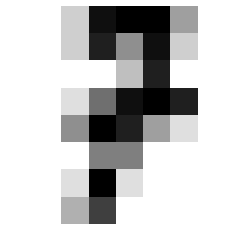

Displayed digit: 7


In [2]:
# TODO: reshape a sample and use imshow to display the digit image
import numpy as np
import matplotlib.pyplot as plt
sample = np.random.randint(len(X))
plt.imshow(X[sample].reshape((8,8)), cmap="gray_r")
plt.axis("off")
plt.show()
print('Displayed digit:', y[sample])

You will now reduce the dimensionality of our data by applying PCA on it.

First, a short reminder or intro on PCA:

- what is a PCA
- warning: needs centered data
- How to implement it
- How to use it with a number of components, or with a retained variance...


PCA stands for Principal Component Analysis. It allows to project data onto a given number of axis, in order to minimize the variance:
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1-H7rbHT-qvci1ckOi-CE97cqudY9jJcS">
</p>

To be used properly, the data needs to be zero-centered. Basically, you can rescale the data before using PCA, just like most of the machine learning models.

The scikit-learn signature of the PCA is the following:
```python
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)
```

Have a look at the documentation, especially the use of the `n_components` parameter:
- if a positive integer, it will be the number of principal components to keep
- if a float between 0 and 1, it will be the minimum retained variance to keep

After applying PCA (e.g. with `fit_transform()`), one can check the retained variance with the attribute `.explained_variance_ratio_`.

Now, apply PCA to project your data on 2 dimensions.

In [3]:
# TODO: Perform PCA on the data with 2 retained dimensions (after mean normalization)
from sklearn.decomposition import PCA

X_scale = (X - X.mean(axis=0))/np.max(X)
pca = PCA(n_components=2)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)

Now you can display the results: display the PCA values on a scatter plot, with as color the label of the data. Compute and display the retained variance.

Does the PCA help separate the classes? How will a linear classification model perform on such data?

retained variance: 0.28509364823690164


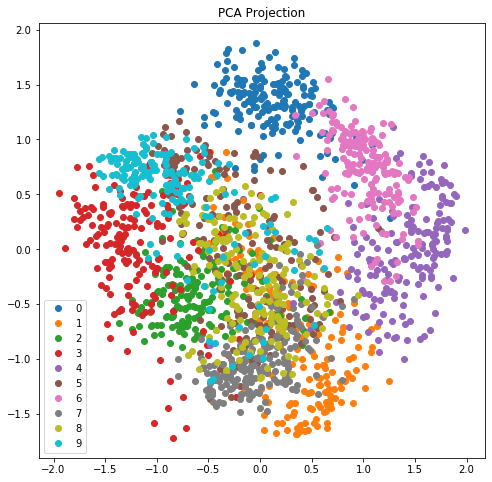

In [4]:
# TODO: Display the results of the PCA and the retained variance
print('retained variance:', pca.explained_variance_ratio_.sum())
plt.figure(figsize=(8,8))
for label in np.unique(y):
    plt.plot(X_pca[y == label, 0], X_pca[y == label, 1], 'o', label=str(label))
plt.legend(loc=0)
plt.title('PCA Projection')
plt.show()

What about this retained variance? Is it enough for you?

How many components shall we keep in order to have a 99% retained variance?

In [5]:
# TODO: Compute the number of components needed to retained 99% variance
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scale)
print('number of components:', pca.components_.shape[0])

number of components: 41


Now, use the output of the PCA to with 99% retained variance to perform classification, and evaluate your model.

In [6]:
# TODO: Classify and evaluate a classification model (do not forget to split!)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=.2, 
                                                    stratify=y, 
                                                    random_state=0)

lr = LogisticRegression()
lr.fit(X_pca_train, y_pca_train)

y_pred = lr.predict(X_pca_test)

print('accuracy:', accuracy_score(y_pca_test, y_pred))

accuracy: 0.9638888888888889


Feel free to use gridsearch and other models to improve your results if needed.